In [ ]:
//@version=5
//xauusd OANDA
indicator("Highlight Key Hour Candles", overlay = true, max_labels_count = 300, max_lines_count = 300, max_boxes_count = 300, max_bars_back = 300)

// Define the time conditions for specified key hours in UTC+8
A = (hour == 14 and minute == 0)         // 2:00 am
B = (hour == 7 and minute == 30)        // 3:30 PM
C = (hour == 18 and minute == 0)        // 6:00 AM next day
F = (hour == 18 and minute == 6)        // 6:03 AM next day
D = (hour == 20 and minute == 0)       // 8:00 AM next day
E = (hour == 8 and minute == 30)       // 8:00 PM next day

// Draw horizontal lines 
var line OpenLine = na
var label OpenLabel = na

if D //8am
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 14, y2=open, extend=extend.none, color=color.black, width=1)
    OpenLabel := label.new(x=bar_index + 15, y=open, text="8AM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.black, size=size.tiny, color=color.rgb(54, 58, 69, 100))
// Optional: Add a line and label for 4:30 AM
if C //6am
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 14, y2=open, extend=extend.none, color=color.red, width=1)
    OpenLabel := label.new(x=bar_index + 15, y=open, text="6AM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.red, size=size.tiny, color=color.rgb(54, 58, 69, 100))
if A //2am
    OpenLine := line.new(x1=bar_index, y1=close, x2=bar_index + 6, y2=close, extend=extend.none, color=color.blue, width=1)
    OpenLabel := label.new(x=bar_index + 6, y=close, text="2AM " + str.tostring(close, format.mintick), style=label.style_label_left, textcolor=color.blue, size=size.tiny, color=color.rgb(54, 58, 69, 100))
if E //8pm
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 6, y2=open, extend=extend.none, color=color.orange, width=1)
    OpenLabel := label.new(x=bar_index + 6, y=open, text="8PM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.orange, size=size.tiny, color=color.rgb(54, 58, 69, 100))
// Combine all key hour conditions
if F //8pm
    OpenLine := line.new(x1=bar_index, y1=open, x2=bar_index + 14, y2=open, extend=extend.none, color=color.red, width=1)
    OpenLabel := label.new(x=bar_index + 15, y=open, text="6:03AM " + str.tostring(open, format.mintick), style=label.style_label_left, textcolor=color.red, size=size.tiny, color=color.rgb(54, 58, 69, 100))
// Combine all key hour conditions
Highlight = B or C or D or E or F

// Highlight the key hour candles with a subtle color
bgcolor(Highlight ? color.new(color.gray, 90) : na)
bgcolor(D? color.new(#363a45, 75) : na)

// Determine bullish or bearish candles at key hours (currently unused)
isBullish = close > open
isBearish = close < open

// Get the current day of the week and the current time
isMonday = dayofweek == dayofweek.sunday
currentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define the time range for 6:00 AM to 8:00 AM
startTime = timestamp(year, month, dayofmonth, 18, 6) // 6:00 AM
endTime = timestamp(year, month, dayofmonth, 20, 0)   // 8:00 AM

// Check if it's Monday and the current time is within the range of 6:00 AM to 8:00 AM
isInTimeRange = isMonday and currentTime >= startTime and currentTime <= endTime

// Highlight the area with a background color
bgcolor(isInTimeRange ? color.new(color.blue, 90) : na)

// Add adjustable color inputs for the candle colors
bullishColor = input.color(#089981, title="Bull Border")
bearishColor = input.color(color.red, title="Bear Border")
bgBullishColor = input.color(color.new(#089981, 50), title="Bull Body")
bgBearishColor = input.color(color.new(color.red, 50), title="Bear Body")

//Candle One formation from 6:00 AM, coding starts here
// Get current daily candle OHLC values
d_open  = request.security(syminfo.tickerid, "D", open)
d_high  = request.security(syminfo.tickerid, "D", high)
d_low   = request.security(syminfo.tickerid, "D", low)
d_close = request.security(syminfo.tickerid, "D", close)

// Candle color logic for the first formation
bullish = d_close >= d_open
candleColor = bullish ? bullishColor : bearishColor
bgColor = bullish ? bgBullishColor : bgBearishColor

// Candle body width and offset
offset = 30
bodyWidth = 4
right_index = bar_index + offset + bodyWidth / 2
left_index = bar_index + offset - bodyWidth / 2
xCenter = int(bar_index + offset)

// Draw candle body
var box dailyBox = na
box.delete(dailyBox)
bodyTop = math.max(d_open, d_close)
bodyBottom = math.min(d_open, d_close)
dailyBox := box.new(left=int(left_index), right=int(right_index), top=bodyTop, bottom=bodyBottom, border_color=candleColor, bgcolor=bgColor)

// Draw wicks
var line wickTop = na
var line wickBottom = na
line.delete(wickTop)
line.delete(wickBottom)
wickTop := line.new(x1=xCenter, y1=d_high, x2=xCenter, y2=bodyTop, color=candleColor)
wickBottom := line.new(x1=xCenter, y1=bodyBottom, x2=xCenter, y2=d_low, color=candleColor)

// === Minimal Price Labels ===
var label lblOpen = na
var label lblHigh = na
var label lblLow = na
var label lblClose = na
label.delete(lblOpen)
label.delete(lblHigh)
label.delete(lblLow)
label.delete(lblClose)
// Label properties
labelStyle  = label.style_label_right
labelSize   = size.tiny
labelOffset = - 2  // bars to the right of the candle

lblOpen := label.new(x=xCenter + labelOffset, y=d_open,text="O " + str.tostring(d_open, format.mintick),style=labelStyle, color=color.new(#2195f3, 100),size=labelSize,textcolor=color.black)
lblHigh := label.new(x=xCenter + labelOffset, y=d_high,text="H " + str.tostring(d_high, format.mintick),style=labelStyle, color=color.new(#2195f3, 100),size=labelSize,textcolor=color.black)
lblLow := label.new(x=xCenter + labelOffset, y=d_low,text="L " + str.tostring(d_low, format.mintick),style=labelStyle, color=color.new(#2195f3, 100),size=labelSize,textcolor=color.black)
lblClose := label.new(x=xCenter + labelOffset, y=d_close,text="C " + str.tostring(d_close, format.mintick),style=labelStyle, color=color.new(#2195f3, 100),size=labelSize,textcolor=color.black)
//dotlines
var line marketOpenLine = na
line.delete(marketOpenLine)
marketOpenLine := line.new(x1 = bar_index,y1 = d_open,x2 = xCenter,y2 = d_open,color = color.rgb(120, 120, 135, 70),style = line.style_dotted,width = 1)

//Candle formation from 6:00 AM, coding ends here

//Candle formation from 8:00 AM, coding starts here
// Define the start time at 12:00 AM UTC
startHour = 24
startMinute = 0

// Get the timestamp for today's 12:00 AM UTC
sstartTime = timestamp("UTC", year, month, dayofmonth, startHour, startMinute)
// Manually define the custom Open, High, Low, Close values
var float customD1Open = na
var float customD1High = na
var float customD1Low = na
var float customD1Close = na

// Reset the custom D1 values at the start of the 12:00 AM UTC
if (time == sstartTime)
    customD1Open := open
    customD1High := high
    customD1Low := low
    customD1Close := close
// Update custom D1 High, Low, and Close throughout the day
if (not na(customD1Open))
    customD1High := math.max(customD1High, high)
    customD1Low := math.min(customD1Low, low)
    customD1Close := close
// Use the custom manually calculated D1 candle
d1_open = customD1Open
d1_high = customD1High
d1_low = customD1Low
d1_close = customD1Close

// D1 Candle color logic for the second formation
d1_bullish = d1_close >= d1_open
d1_candleColor = d1_bullish ? bullishColor : bearishColor
d1_bgColor = d1_bullish ? bgBullishColor : bgBearishColor

// D1 Candle body width and offset
d1_offset = 35
d1_bodyWidth = 4
d1_right_index = bar_index + d1_offset + d1_bodyWidth / 2
d1_left_index = bar_index + d1_offset - d1_bodyWidth / 2
d1_xxCenter = int(bar_index + d1_offset)

// Draw D1 Candle body
var box d1Box = na
box.delete(d1Box)
d1_bodyTop = math.max(d1_open, d1_close)
d1_bodyBottom = math.min(d1_open, d1_close)
d1Box := box.new(left=int(d1_left_index), right=int(d1_right_index), top=d1_bodyTop, bottom=d1_bodyBottom, border_color=d1_candleColor, bgcolor=d1_bgColor)

// Draw D1 wicks
var line d1WickTop = na
var line d1WickBottom = na
line.delete(d1WickTop)
line.delete(d1WickBottom)
d1WickTop := line.new(x1=d1_xxCenter, y1=d1_high, x2=d1_xxCenter, y2=d1_bodyTop, color=d1_candleColor)
d1WickBottom := line.new(x1=d1_xxCenter, y1=d1_bodyBottom, x2=d1_xxCenter, y2=d1_low, color=d1_candleColor)

// === Minimal Price Labels for D1 ===
var label d1LblOpen = na
var label d1LblHigh = na
var label d1LblLow = na
var label d1LblClose = na
label.delete(d1LblOpen)
label.delete(d1LblHigh)
label.delete(d1LblLow)
label.delete(d1LblClose)

// Label properties for D1
d1_labelStyle  = label.style_label_left
d1_labelSize   = size.tiny
d1_labelOffset = 2  // bars to the right of the D1 candle

// Add D1 labels with minimal font size and black text color
d1LblOpen := label.new(x=d1_xxCenter + d1_labelOffset, y=d1_open, text="O " + str.tostring(d1_open, format.mintick), style=d1_labelStyle, color=color.new(#2195f3, 100), size=d1_labelSize, textcolor=color.black)
d1LblHigh := label.new(x=d1_xxCenter + d1_labelOffset, y=d1_high, text="H " + str.tostring(d1_high, format.mintick), style=d1_labelStyle, color=color.new(#2195f3, 100), size=d1_labelSize, textcolor=color.black)
d1LblLow := label.new(x=d1_xxCenter + d1_labelOffset, y=d1_low, text="L " + str.tostring(d1_low, format.mintick), style=d1_labelStyle, color=color.new(#2195f3, 100), size=d1_labelSize, textcolor=color.black)
d1LblClose := label.new(x=d1_xxCenter + d1_labelOffset, y=d1_close, text="C " + str.tostring(d1_close, format.mintick), style=d1_labelStyle, color=color.new(#2195f3, 100), size=d1_labelSize, textcolor=color.black)
//dotlines
var line mmarketOpenLine = na
line.delete(mmarketOpenLine)
mmarketOpenLine := line.new(x1 = bar_index,y1 = customD1Open,x2 = d1_xxCenter,y2 = customD1Open,color = color.rgb(120, 120, 135, 70),style = line.style_dotted,width = 1)
//Candle Two formation from 8:00 AM, coding ends here

bullC       = input.color(defval = #14D990, title = "Bull Color", group = "Smart Money Concepts", inline = "7")
bearC       = input.color(defval = #F24968, title = "Bear Color", group = "Smart Money Concepts", inline = "7")
showInt     = input.bool(defval = true, title = "Show Internals", group = "Smart Money Concepts")
intSens     = input.int(5, "Internals Sensitivity", options =  [3 , 5 , 8, 9, 10, 11, 12, 14, 24, 75 ], group = "Smart Money Concepts", inline = "20")
intStru     = input.string(defval = "All", title = "Internal Structure", options = ["All", "B", "C"], inline = "30", group = "Smart Money Concepts")
showExt     = input.bool(defval = true, title = "Show Externals" ,group = "Smart Money Concepts")
extSens     = input.int(24, "Externals Sensitivity", options = [10, 14, 24, 25, 50],group = "Smart Money Concepts", inline = "21")
extStru     = input.string(defval = "All", title = "External Structure", options = ["All", "B", "C"], inline = "31", group = "Smart Money Concepts")
showLast    = input.int(defval = 10, title = "Swing Order Blocks", minval = 0, group = "Swing Blocks")
showHHLH    = input.bool(defval = true, title = "Show HH/LH", group = "Swing Blocks")
showHLLL    = input.bool(defval = true, title = "Show LH/LL", group = "Swing Blocks")


var bigData = map.new<string, float>()

if bigData.size() == 0

    bigData.put("moving", 0)
    bigData.put("upaxis", 0.0) 
    bigData.put("upaxis2", 0)
    bigData.put("dnaxis", 0.0) 
    bigData.put("dnaxis2", 0)
    bigData.put("upside", 1)
    bigData.put("downside", 1)

[pdHigh, pdLow, dayHigh, dayLow, pdBar, dayBar] = request.security(syminfo.tickerid, "1D", [high[1], low[1], high, low, time[1], time])

var highArr = array.new_float(), var lowArr  = array.new_float()
var timeArr = array.new_int  (), var volArr  = array.new_float()
var closeArr = array.new_float(), var openArr = array.new_float()

highArr.unshift(high), lowArr.unshift(low)
timeArr.unshift(time), volArr.unshift(volume)
closeArr.unshift(close), openArr.unshift(open)

type rollingTF 
    float highTF                  = 0
    float lowTF                   = 1e8
    int   highTFt                 = 0
    int   lowTFt                  = 0
    float volTF                   = 0
    map   <string, line >         rTFdraw
    map   <string, label>         rTFlabel

method tfDraw(int tfDiff, bool showRollingLab, string tf, bool showLevels) => 
    TFhrdata = rollingTF.new(), var volRolling = array.new<float>()
    if highArr.size() > tfDiff

        for i = 0 to tfDiff
            if showLevels and barstate.islast
                getHigh = highArr.get(i), getLow = lowArr.get(i), 
                             getTime = timeArr.get(i)
                TFhrdata.highTF := math.max(TFhrdata.highTF, getHigh)
                TFhrdata.lowTF  := math.min(TFhrdata.lowTF , getLow )
                if TFhrdata.highTF == getHigh 
                    TFhrdata.highTFt := timeArr.get(i)
                if TFhrdata.lowTF == getLow
                    TFhrdata.lowTFt  := timeArr.get(i)
            TFhrdata.volTF += volArr.get(i)

        volRolling.push(TFhrdata.volTF)

        var lineDraw = rollingTF.new(rTFdraw = map.new<string, line>(), rTFlabel = map.new<string, label>())
        if showLevels
            switch lineDraw.rTFdraw.size() == 0
                true =>  lineDraw.rTFdraw.put("High", line.new(TFhrdata.highTFt, TFhrdata.highTF, time, TFhrdata.highTF, 
                                                 xloc = xloc.bar_time, color = color.aqua)),
                         lineDraw.rTFdraw.put("Low" , line.new(TFhrdata.lowTFt , TFhrdata.lowTF , time, TFhrdata.lowTF , 
                                                 xloc = xloc.bar_time, color = color.aqua))  

                =>       lineDraw.rTFdraw.get("High").set_xy1(TFhrdata.highTFt, TFhrdata.highTF),
                         lineDraw.rTFdraw.get("High").set_xy2(time, TFhrdata.highTF),

                         lineDraw.rTFdraw.get("Low").set_xy1(TFhrdata.lowTFt, TFhrdata.lowTF),
                         lineDraw.rTFdraw.get("Low").set_xy2(time, TFhrdata.lowTF)

            if showRollingLab 
                switch lineDraw.rTFlabel.size() == 0
                    true =>  lineDraw.rTFlabel.put("High", label.new(time, TFhrdata.highTF, xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "H", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         )),
                             lineDraw.rTFlabel.put("Low" , label.new(time, TFhrdata.lowTF , xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "L", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         ))  
                    =>       lineDraw.rTFlabel.get("High") .set_xy(time, TFhrdata.highTF),
                             lineDraw.rTFlabel.get("Low")  .set_xy(time, TFhrdata.lowTF)
    [TFhrdata.volTF, volRolling]

tfDrawLower(bool showRollingLab, simple string tf, bool showLevels) => 
    simple int end = switch tf 
        "240" => 240
        "1D"  => 1440
    [o, h, l, c, v, t] = request.security_lower_tf(syminfo.tickerid, "1", [open, high, low, close, volume, time])

    var oArr = array.new_float()
    var hArr = array.new_float()
    var lArr = array.new_float()
    var cArr = array.new_float()
    var vArr = array.new_float()
    var tArr = array.new_int()

    TFhrdata = rollingTF.new(), var volRolling = array.new<float>()
    if h.size() > 0
        for i = 0 to h.size() - 1
            oArr.push(o.get(i))
            hArr.push(h.get(i))
            lArr.push(l.get(i))
            cArr.push(c.get(i))
            vArr.push(v.get(i))
            tArr.push(t.get(i))

            if hArr.size() > end 
                oArr.shift()
                hArr.shift()
                lArr.shift()
                cArr.shift()
                vArr.shift()
                tArr.shift()

        for i = 0 to hArr.size() - 1
            if showLevels 
                getHigh = hArr.get(i), getLow = lArr.get(i), 
                             getTime = tArr.get(i)
                TFhrdata.highTF := math.max(TFhrdata.highTF, getHigh)
                TFhrdata.lowTF  := math.min(TFhrdata.lowTF , getLow)

                if TFhrdata.highTF == getHigh 
                    TFhrdata.highTFt := tArr.get(i)

                if TFhrdata.lowTF == getLow
                    TFhrdata.lowTFt  := tArr.get(i)
            TFhrdata.volTF  += vArr.get(i)

        volRolling.push(TFhrdata.volTF)

        var lineDraw = rollingTF.new(rTFdraw = map.new<string, line>(), rTFlabel = map.new<string, label>())
        if showLevels
            switch lineDraw.rTFdraw.size() == 0
                true =>  lineDraw.rTFdraw.put("High", line.new(TFhrdata.highTFt, TFhrdata.highTF, time, TFhrdata.highTF, 
                                                 xloc = xloc.bar_time, color = color.aqua)),
                         lineDraw.rTFdraw.put("Low" , line.new(TFhrdata.lowTFt , TFhrdata.lowTF , time, TFhrdata.lowTF , 
                                                 xloc = xloc.bar_time, color = color.aqua))  
                =>       lineDraw.rTFdraw.get("High").set_xy1(TFhrdata.highTFt, TFhrdata.highTF),
                         lineDraw.rTFdraw.get("High").set_xy2(time, TFhrdata.highTF),

                         lineDraw.rTFdraw.get("Low").set_xy1(TFhrdata.lowTFt, TFhrdata.lowTF),
                         lineDraw.rTFdraw.get("Low").set_xy2(time, TFhrdata.lowTF)

            if showRollingLab 
                switch lineDraw.rTFlabel.size() == 0
                    true =>  lineDraw.rTFlabel.put("High", label.new(time, TFhrdata.highTF, xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "H", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         )),
                             lineDraw.rTFlabel.put("Low" , label.new(time, TFhrdata.lowTF , xloc = xloc.bar_time, 
                                                         textcolor = color.aqua, 
                                                         text      = tf + "L", 
                                                         size      = size.tiny, 
                                                         style     = label.style_label_left, 
                                                         color     = #00000000
                                                         ))  
                    =>       lineDraw.rTFlabel.get("High") .set_xy(time, TFhrdata.highTF),
                             lineDraw.rTFlabel.get("Low")  .set_xy(time, TFhrdata.lowTF)
    [TFhrdata.volTF, volRolling]

var r4hrbars = math.floor(timeframe.in_seconds("240") / timeframe.in_seconds(timeframe.period))
var rDbars   = math.floor(timeframe.in_seconds("1D") / timeframe.in_seconds(timeframe.period))

calculatePivots(length)=>
    var int intraCalc = 0
    if bar_index > length + 1
        up  = highArr.slice(0, length).max()
        dn  = lowArr .slice(0, length).min() 
        cHi = highArr.get(length)
        cLo = lowArr .get(length)

        intraCalc := switch 
            cHi > up => 0 
            cLo < dn => 1 
            =>          intraCalc[1]
        topSwing = switch 
            intraCalc == 0 and intraCalc[1] != 0 => cHi 
            =>                                      0 

        botSwing = switch 
            intraCalc == 1 and intraCalc[1] != 1 => cLo
            =>                                      0 

        [topSwing, botSwing]

[bigUpper    , bigLower   ]     = calculatePivots(extSens)
[smallUpper  , smallLower ]     = calculatePivots(intSens)

var label [] upLabel = array.new_label(1)
var label [] dnLabel = array.new_label(1)

var box [] highBlock = array.new_box()
var box [] lowBlock  = array.new_box()

drawChar(x, y, str, col, down) =>
    style = switch down 
        true => label.style_label_down
        =>      label.style_label_up
    line.new (int(x), y, bar_index, y, color = col, style = line.style_dotted)
    label.new(math.round(math.avg(x, bar_index)), y, str, color = #00000000, textcolor = col, style = style, size = size.tiny)
drawStructureExt() => 
    var int counter = 0
    if bigUpper != 0
        bigData.put("upside", 1)
        x1 = bar_index - extSens
        txt = switch bigUpper > bigData.get("upaxis")
            true => 'HH'
            =>      'LH'
        if showHHLH
            upLabel.set(0, label.new(x1, bigUpper, txt,
                          color     = color.new(color.white, 100), 
                          textcolor = bearC, 
                          style     = label.style_label_down, 
                          size      = size.tiny
                          ))
        bigData.put("upaxis" , bigUpper)
        bigData.put("upaxis2", x1)
        counter := 1

    if bigLower != 0
        bigData.put("downside", 1)
        x1 = bar_index - extSens
        txt = switch bigLower < bigData.get("dnaxis") 
            true => "LL" 
            =>      "HL"
        if showHLLL == true 
            dnLabel.set(0, label.new(x1, bigLower, txt, color = #ffffff00, 
                         textcolor = bullC, 
                         style     = label.style_label_up, 
                         size      = size.tiny
                         ))
    
    if showExt
        if ta.crossover(close, bigData.get("upaxis"))
            if bigData.get("upside") != 0
                str = switch bigData.get("moving") < 0
                    true => extStru != "B"   ? 'C' : "" 
                    =>      extStru != 'C' ? 'B'   : ""
                if extStru == "All" or str.contains(extStru, str)
                    drawChar(bigData.get("upaxis2"), bigData.get("upaxis"), str, bullC, true)

                bigData.put("upside", 0)
                bigData.put("moving", 1)
        if ta.crossunder(close, bigData.get("dnaxis"))
            if bigData.get("downside") != 0
                str = switch bigData.get("moving") > 0
                    true => extStru != "B"   ? 'C' : "" 
                    =>      extStru != 'C' ? 'B'   : ""
                if extStru == "All" or str.contains(extStru, str)
                    drawChar(bigData.get("dnaxis2"), bigData.get("dnaxis"), str, bearC, false)
                bigData.put("downside", 0)
                bigData.put("moving", -1)
    counter 
counter = drawStructureExt()
drawStructureInternals() => 
    if showInt 
        var keyValues = map.new<string, float>()
        if keyValues.size() == 0 
            keyValues.put("movingSmall", 0)
        if smallUpper != 0 
            keyValues.put("upsideSmall", 1)          
            keyValues.put("upaxisSmall", smallUpper) 
            keyValues.put("upaxis2Small", bar_index - intSens)

        if smallLower != 0 
            keyValues.put("downsideSmall", 1)       
            keyValues.put("dnaxisSmall", smallLower)
            keyValues.put("dnaxis2Small", bar_index - intSens)

        if ta.crossover(close, keyValues.get("upaxisSmall")) 
            if keyValues.get("upsideSmall") != 0
                str = switch 
                    keyValues.get("movingSmall") < 0 =>     intStru != "B"   ? 'I-C' : "" 
                    =>                                      intStru != "C" ? 'I-B'   : ""
                if intStru == "All" or str.contains(str, intStru)
                    drawChar(keyValues.get("upaxis2Small"), keyValues.get("upaxisSmall"), str, bullC, true)
                keyValues.put("upsideSmall", 0)
                keyValues.put("movingSmall", 1)

        if ta.crossunder(close, keyValues.get("dnaxisSmall"))
            if keyValues.get("downsideSmall") != 0
                str = switch 
                    keyValues.get("movingSmall") > 0 => intStru != "B"   ? 'I-C' : ""
                    =>                                  intStru != "C" ? 'I-B'   : ""
                if intStru == "All" or str.contains(str, intStru)
                    drawChar(keyValues.get("dnaxis2Small"), keyValues.get("dnaxisSmall"), str, bearC, false)
                keyValues.put("downsideSmall", 0)
                keyValues.put("movingSmall", -1)
drawStructureInternals()

nyHour   = hour  (timenow, "America/New_York")
nyMinute = minute(timenow, "America/New_York")

calculateTimeDifference(timestamp1, timestamp2) =>
    timeDifference = timestamp2 - timestamp1
    hours = math.floor(timeDifference / 3600000)
    minutes = math.floor((timeDifference % 3600000) / 60000)
    [hours, minutes]

dayAdjustment = (hour(timenow, "America/New_York") < 2) ? dayofmonth(timenow) + 1 : dayofmonth(timenow)
dayAdjustment2 = nyHour >= 20 or nyHour < 2 ? dayofmonth(timenow) + 1 : dayofmonth(timenow)

timeIsInRange(startHour, startMinute, endHour, endMinute) =>
    (nyHour > startHour or (nyHour == startHour and nyMinute >= startMinute)) and (nyHour < endHour or (nyHour == endHour and nyMinute <= endMinute))

[chartcol, timetilchange, stringCol, stringCol2] = switch 
    timeIsInRange(9, 30, 16, 0) => [#f24968  , timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 16, 0, 0), "New York", "Asia"]
    timeIsInRange(20, 0, 2 , 0) => [#14D990  , timestamp("America/New_York", year(timenow), month(timenow), dayAdjustment, 2, 0, 0), "Asia", "London"]
    timeIsInRange(3, 0, 11, 30) => [#F2B807  , timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 11, 30, 0), "London", "New York"]
    => [color.gray, int(na), "Dead Zone", (nyHour > 16 or nyHour < 3) ? "London" : (nyHour >= 11 and nyHour < 20) ? "Asia" : "New York"]                        

[hours, minutes] = calculateTimeDifference(timenow, timetilchange)

timetilchange2 = switch
    timeIsInRange(9, 30, 16, 0)  => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 20, 0, 0) 
    timeIsInRange(20, 0, 2 , 0)  => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 3, 0, 0)  
    timeIsInRange(3, 0, 11, 30)  => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 9, 30, 0) 
    => na 

if na(timetilchange2)
    timetilchange2 := switch
        nyHour < 9 or (nyHour == 9 and nyMinute < 30) => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 9, 30, 0) 
        nyHour < 20 or (nyHour >= 16 and nyHour < 20) => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 20, 0, 0) 
        nyHour < 3 or (nyHour >= 2 and nyHour < 3)    => timestamp("America/New_York", year(timenow), month(timenow), dayofmonth(timenow), 3, 0, 0)     
        => na  

[hours2, minutes2] = calculateTimeDifference(timenow, timetilchange2)

//Smart SMA daily reset
ssmaLength = input.int(14, title="SMA Length")
pprice = input(close, title="Price Source")

ccurrentUTC = timestamp("UTC", year, month, dayofmonth, 0, 0)

var float ssum = na
var int ccount = 0
var float ddailySMA = na
var int ddayStart = na

if (na(ddayStart) or time >= ddayStart + 86500000)
    // Reset at the start of a new UTC day
    ddayStart := ccurrentUTC
    ssum := 0
    ccount := 0
    ddailySMA := na

// Update SMA values only within the current UTC day
ssum += pprice
ccount += 1

if ccount >= ssmaLength
    ddailySMA := ssum / ccount
plot(ddailySMA, title="Daily Reset SMA", color=color.rgb(255, 153, 0, 71), linewidth=1)

//simple SMA 
smaLength = input.int(24, title="SMA Length")
price = input(open, title="Price Source")

liveSMA = ta.sma(price, smaLength)

plot(liveSMA, title="Live SMA", color=color.rgb(33, 149, 243, 88), linewidth=2)

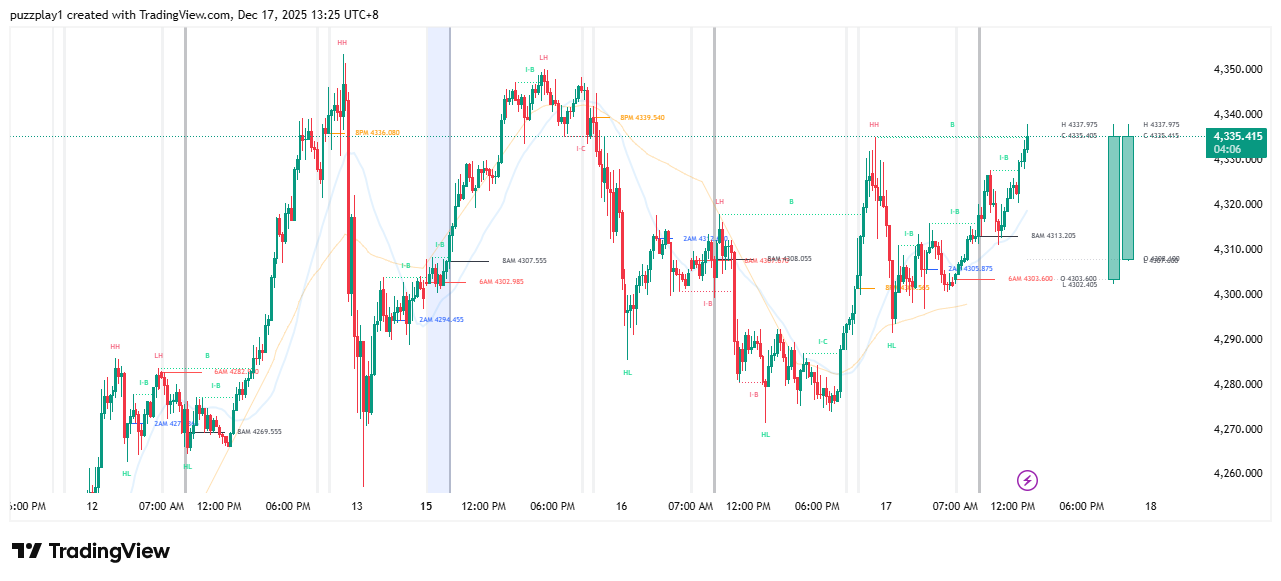